## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>Saturn</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>wagon</li>
    </ul>
</li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [241]:
library(magrittr)
library("caret")
data(cars)
head(cars)

Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
30315.17,23635,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

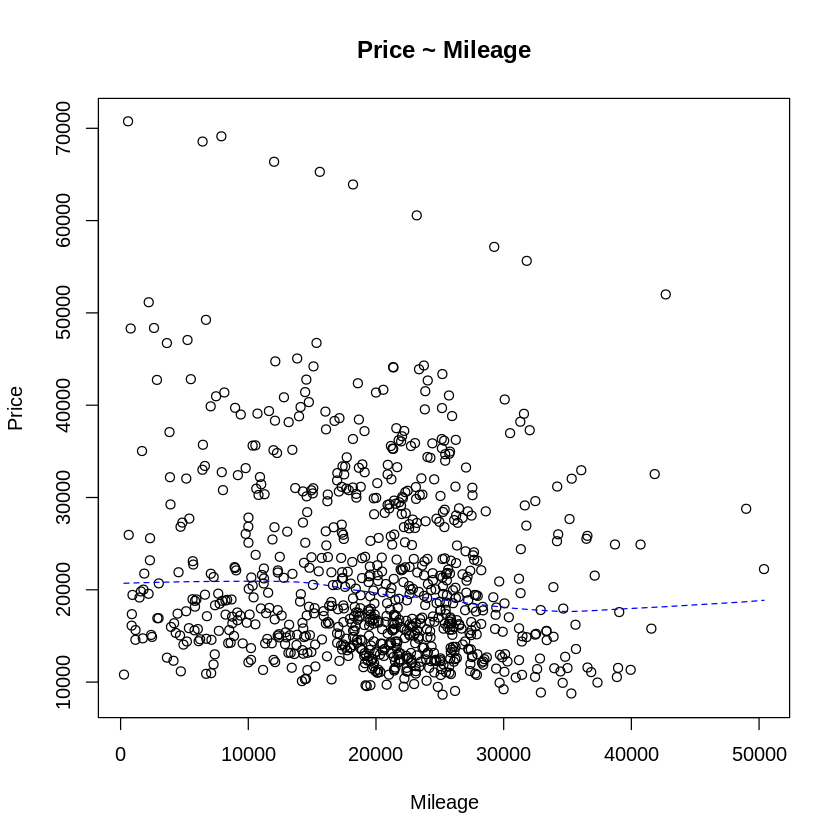

In [242]:
# Put the command (or commands) here that would give answer to the above question.
plot(cars$Price ~ cars$Mileage, main = "Price ~ Mileage", xlab = "Mileage", ylab = "Price")
lines(lowess(cars$Price ~ cars$Mileage), lty = 2, col = "blue")

> From the scatter plot (where dashed blue line is the lowess line), it does not appear that high mileage cars are 
significantly cheaper than low mileage ones.  

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [243]:
# Linear regression model:
mod_Mileage <- lm(formula = Price ~ Mileage, data = cars)

# Show summary statistics for the model:
summary(mod_Mileage)


Call:
lm(formula = Price ~ Mileage, data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-13905  -7254  -3520   5188  46091 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.476e+04  9.044e+02  27.383  < 2e-16 ***
Mileage     -1.725e-01  4.215e-02  -4.093 4.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9789 on 802 degrees of freedom
Multiple R-squared:  0.02046,	Adjusted R-squared:  0.01924 
F-statistic: 16.75 on 1 and 802 DF,  p-value: 4.685e-05


> $\hat{E}(Price | mileage) = 24760 - 0.1725{\cdot}Mileage$  

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [244]:
# Command:
miles <- 0
24760 - 0.1725*(miles)      # estimated (mean) Price at miles
24760 - 0.1725*(miles + 1)  # estimated (mean) Price miles + 1

[1] 24760

[1] 24759.83

> For every one additional mileage accumulated by the car, there is a drop of 0.1725 dollars in the price of the car. In terms of the _estimated_ price, there is essentially no difference between the prices of two cars that differ by one additional mile.

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [245]:
# Single command
24760 - 0.1725*(0)

[1] 24760

> According to the model, a car with zero miles would cost $24,760.

<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

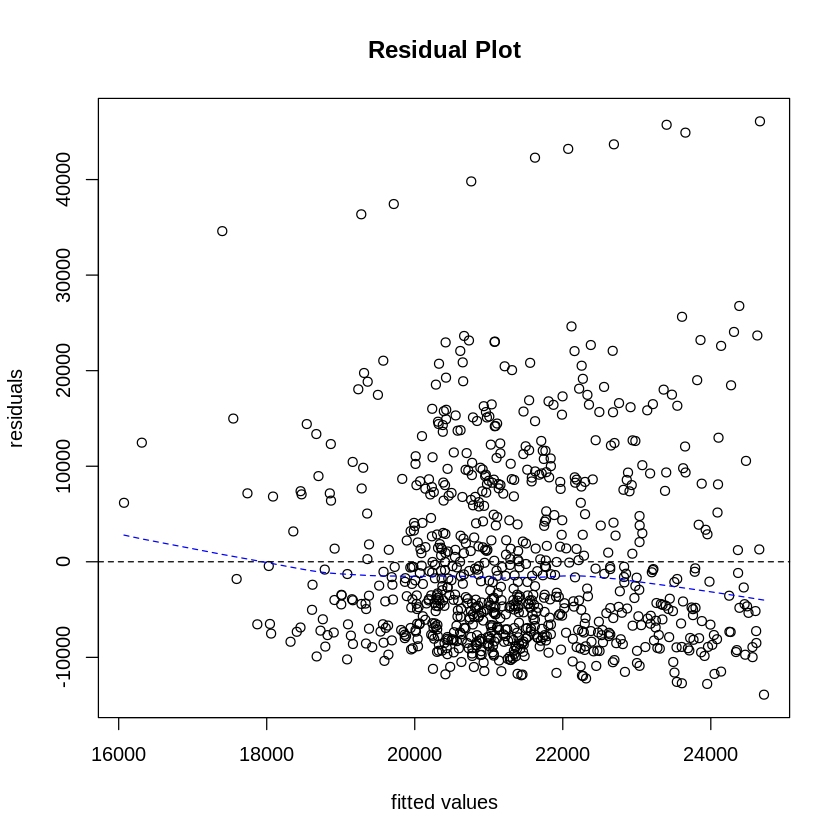

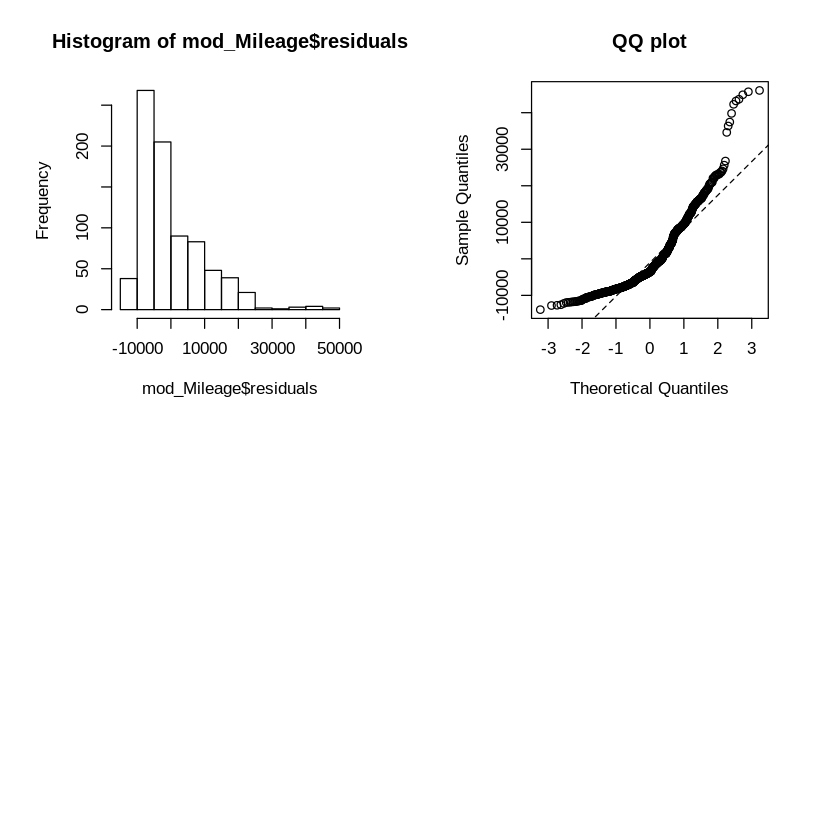

In [246]:
# Plot residuals
plot(mod_Mileage$residuals ~ mod_Mileage$fitted.values, main = "Residual Plot", xlab = "fitted values", ylab = "residuals")
abline(h = 0, lty =2)
lines(lowess(mod_Mileage$residuals ~ mod_Mileage$fitted.values), lty =2, col = "blue")

par(mfrow = c(2,2), pty = "s")

# histogram of residuals
hist(mod_Mileage$residuals)

# QQ plot
qqnorm(mod_Mileage$residuals, main = "QQ plot")
qqline(mod_Mileage$residuals, lty = 2)

> Yes. While the linearity and constant variance assumptions seem to hold, the __normality__ assumption that [Y|x] is normally distributed is not met. This is apparent in the residual histogram plot and QQ plot (which exhibits a classic pattern indicative of a right-skewed distribution).  

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [247]:
# Commands:
mod2 <- lm(formula = Price ~ Mileage+Cylinder+Doors+Cruise+Sound+Leather, data = cars)
summary(mod2)


Call:
lm(formula = Price ~ Mileage + Cylinder + Doors + Cruise + Sound + 
    Leather, data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-13104  -5566  -1544   3877  33349 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.323e+03  1.771e+03   4.135 3.92e-05 ***
Mileage     -1.705e-01  3.186e-02  -5.352 1.14e-07 ***
Cylinder     3.200e+03  2.030e+02  15.765  < 2e-16 ***
Doors       -1.463e+03  3.083e+02  -4.747 2.45e-06 ***
Cruise       6.206e+03  6.515e+02   9.525  < 2e-16 ***
Sound       -2.024e+03  5.707e+02  -3.547 0.000412 ***
Leather      3.327e+03  5.971e+02   5.572 3.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7387 on 797 degrees of freedom
Multiple R-squared:  0.4457,	Adjusted R-squared:  0.4415 
F-statistic: 106.8 on 6 and 797 DF,  p-value: < 2.2e-16


> The model incorporating $Mileage, Cylinder, Doors, Cruise, Sound, Leather$ as predictors is more accurate (adjusted $R^2=0.4415$) compared to the model using only $Mileage$ as predictor ($R^2=0.02046$). In other words, the multiple regression model explains 44.15% of the variance in mean $Price$, compared to only 2.05% using only $Mileage$ as sole predictor.

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [248]:
# correlation matrix
cor(cars[1:7], cars[1:7]) %>% round(.,2)

# Variance Inflation Factor to check for collinearity
car::vif(mod2) %>% round(.,2) %>% as.data.frame()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather
Price,1.00,-0.14,0.57,-0.14,0.43,-0.12,0.16
Mileage,-0.14,1.00,-0.03,-0.02,0.03,-0.03,0.00
Cylinder,0.57,-0.03,1.00,0.00,0.35,-0.09,0.08
Doors,-0.14,-0.02,0.00,1.00,-0.05,-0.06,-0.06
Cruise,0.43,0.03,0.35,-0.05,1.00,-0.09,-0.07
Sound,-0.12,-0.03,-0.09,-0.06,-0.09,1.00,0.17
Leather,0.16,0.00,0.08,-0.06,-0.07,0.17,1.00


,.
Mileage,1.00
Cylinder,1.17
Doors,1.01
Cruise,1.16
Sound,1.05
Leather,1.05


> It does not appear that any of the six predictor variables above are collinear with each other, according to the
Pearson correlation matrix ($|\rho| << 1$, except for perhaps _Price_ vs _Cylinders_), and the Variance Inflation Factor (each variable's VIF is around 1.0, indicating absence of collinearity).

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [249]:
chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1) %>% t() %>% as.data.frame()

# Commands that estimate the price of 'chevy' using the model with 6 predictors
est_price2 <- predict(object = mod2, newdata = chevy, interval = "confidence")
pred_price2 <- predict(object = mod2, newdata = chevy, interval = "predict")

est_price2
pred_price2

,fit,lwr,upr
1,19589.61,18158.87,21020.34


,fit,lwr,upr
1,19589.61,5018.695,34160.52


> At the 95% confidence interval, the expected price of the chevy is $\$19,589.61 \pm 1,430.73$. However, if we wanted to predict the price where 95% of Chevy cars (with the same features) would be, the predicted price would be $\$19,589.61 \pm 14,570.92$

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [250]:
# Commands
mod3 <- lm(formula = Price ~ ., data = cars)
summary(mod3)


Call:
lm(formula = Price ~ ., data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9513.5 -1540.9   125.4  1470.3 13619.7 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.124e+03  9.926e+02  -1.133  0.25773    
Mileage     -1.842e-01  1.256e-02 -14.664  < 2e-16 ***
Cylinder     3.659e+03  1.133e+02  32.286  < 2e-16 ***
Doors        1.567e+03  2.589e+02   6.052  2.2e-09 ***
Cruise       3.409e+02  2.960e+02   1.152  0.24978    
Sound        4.409e+02  2.345e+02   1.880  0.06043 .  
Leather      7.908e+02  2.497e+02   3.167  0.00160 ** 
Buick        9.477e+02  5.525e+02   1.715  0.08670 .  
Cadillac     1.336e+04  6.248e+02  21.386  < 2e-16 ***
Chevy       -5.492e+02  4.397e+02  -1.249  0.21203    
Pontiac     -1.400e+03  4.868e+02  -2.875  0.00414 ** 
Saab         1.228e+04  5.546e+02  22.139  < 2e-16 ***
Saturn              NA         NA      NA       NA    
convertible  1.102e+04  5.419e+02  2

In [251]:
chevy2 <- c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1,
           "Buick"=0, "Cadillac"=0, "Chevy"=1, "Pontiac"=0, "Saab"=0, "Saturn"=0,
          "convertible"=0, "coupe"=0,"hatchback"=0, "sedan"=1, "wagon"=0) %>% t() %>% as.data.frame()

predict(object = mod3, newdata = chevy2, interval = "confidence")
predict(object = mod3, newdata = chevy2, interval = "prediction")

Warning message in predict.lm(object = mod3, newdata = chevy2, interval = "confidence"):
“prediction from a rank-deficient fit may be misleading”

,fit,lwr,upr
1,7695.581,6594.47,8796.693


Warning message in predict.lm(object = mod3, newdata = chevy2, interval = "prediction"):
“prediction from a rank-deficient fit may be misleading”

,fit,lwr,upr
1,7695.581,1885.503,13505.66


> Using a model that includes all the predictors, the expected price of the chevy is $\$7,695.58 \pm 1,101.11$. However, if we wanted to predict the price where 95% of Chevy cars (with the same features) would be, the predicted price would be $\$7,695.58 \pm 5,810.078$. However, the issue with his prediction is that variable _Chevy_ (__p-value = 0.21203__) is not an accurate predictor of car price; so our prediction is almost certainly to be wrong.

> Additionally, it appears that three of the predictors (_Saturn_, _coupe_, and _wagon_) are collinear, resulting in the warning message from the predict() function.